# MULTIVARIATE REGRESSION

##### Adjusted R square :
1. R square measures the variability of our model (how good it fits all the data)
2. Multiple regression is always better than SIMPLE ones (but dont feed garbage)

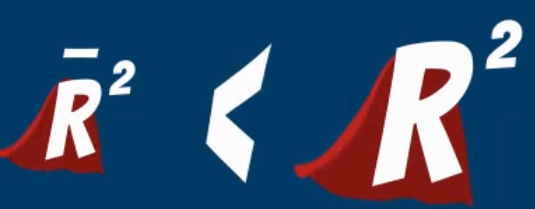

> Adjusted R sq < R sq 

because it penalizes 'excessive use of variables!'
Hence, is good for comparison of models and ofcourse we have to cherry pick the features


### CONDITIONS FOR COMPARING Adj R Sq 

1. same dependant variable(y)
2. same dataset

# IMPORT LIBRARIES


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

# LOAD DATA

In [2]:
dataset = pd.read_csv('./USA_Housing.csv')

In [3]:
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,random
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",1
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",2
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",3
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820,4
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386,5


In [4]:
data = dataset.drop(axis=1, labels='Address')

In [5]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,random
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,1
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,2
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,3
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,4
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,5


# Comparing Adjusted R squared scores

In [6]:
dataWithBadFeature = dataset.drop(axis=1, labels=['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Bedrooms','Area Population'])

In [7]:
dataWithBadFeature.head()

,Avg. Area Number of Rooms,Price,Address,random
0,7.009188,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",1
1,6.730821,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",2
2,8.512727,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",3
3,5.586729,1.260617e+06,USS Barnett\nFPO AP 44820,4
4,7.839388,6.309435e+05,USNS Raymond\nFPO AE 09386,5


In [8]:
dataWithGoodFeature = dataset.drop(axis=1, labels=['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Bedrooms','Area Population', 'Address'])

In [9]:
dataWithGoodFeature.head()

,Avg. Area Number of Rooms,Price,random
0,7.009188,1.059034e+06,1
1,6.730821,1.505891e+06,2
2,8.512727,1.058988e+06,3
3,5.586729,1.260617e+06,4
4,7.839388,6.309435e+05,5


### GOOD MODEL

In [10]:
y = data['Price']
x = data['Avg. Area Number of Rooms']
x = sm.add_constant(x)
goodModel = sm.OLS(y,x).fit()
goodModel.summary2()

E:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                     OLS                    Adj. R-squared:           0.112      
Dependent Variable:        Price                  AIC:                      141340.2551
Date:                      2019-04-16 15:33       BIC:                      141353.2895
No. Observations:          5000                   Log-Likelihood:           -70668.    
Df Model:                  1                      F-statistic:              634.6      
Df Residuals:              4998                   Prob (F-statistic):       6.17e-132  
R-squared:                 0.113                  Scale:                    1.1067e+11 
---------------------------------------------------------------------------------------
                             Coef.     Std.Err.     t    P>|t|     [0.025      0.975]  
---------------------------------------------------------------------------------------
const                     408619.8194 33024.0194 12.3734 0.0000 343878.2523 473361.3865
Avg. Area Number of Rooms 117841.6376  4677.7577 25.1919 0.0000 108671.1802 127012.0950
---------------------------------------------------------------------------------------
Omnibus:                      0.684               Durbin-Watson:                  2.005
Prob(Omnibus):                0.710               Jarque-Bera (JB):               0.725
Skew:                         0.005               Prob(JB):                       0.696
Kurtosis:                     2.942               Condition No.:                  51   
=======================================================================================

"""

### Bad Model

In [12]:
y = data['Price']
x = dataset[['Avg. Area Number of Rooms', 'random']]
x = sm.add_constant(x)
badModel = sm.OLS(y,x).fit()
badModel.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                     OLS                    Adj. R-squared:           0.113      
Dependent Variable:        Price                  AIC:                      141341.2136
Date:                      2019-04-16 15:33       BIC:                      141360.7652
No. Observations:          5000                   Log-Likelihood:           -70668.    
Df Model:                  2                      F-statistic:              317.8      
Df Residuals:              4997                   Prob (F-statistic):       1.16e-130  
R-squared:                 0.113                  Scale:                    1.1066e+11 
---------------------------------------------------------------------------------------
                             Coef.     Std.Err.     t    P>|t|     [0.025      0.975]  
---------------------------------------------------------------------------------------
const                     417348.7367 34114.0965 12.2339 0.0000 350470.1370 484227.3364
Avg. Area Number of Rooms 117782.5612  4678.0969 25.1775 0.0000 108611.4385 126953.6840
random                        -3.3258     3.2597 -1.0203 0.3076     -9.7161      3.0646
---------------------------------------------------------------------------------------
Omnibus:                      0.714               Durbin-Watson:                  2.006
Prob(Omnibus):                0.700               Jarque-Bera (JB):               0.754
Skew:                         0.005               Prob(JB):                       0.686
Kurtosis:                     2.941               Condition No.:                  21117
=======================================================================================
* The condition number is large (2e+04). This might indicate             strong
multicollinearity or other numerical problems.
"""

## COMPARISON : GOOD MODEL vs BAD MODEL

Note :

1. Adusted R  square scores (higher the score, better the model)
2. P values (<0.05 are significant features)
3. F statistic (lower the f statistic, closer to no significant model)
4. Prob(F-statistic) : looooower it s, better the model is ..eg. 0.0000000000000000000000017

Here, Adj R sq values defies logic but see P-value ..it tells 'random' colum is not significan

##### we can add 100 variables and probably predicting power of the model be outstanding.. BUT THIS MAKES REGRESSION FUTILE!
##### (SIMPLICITY IS BETTER REWARDED THAN HIGHER EXPANATORY POWER >>>> FEATURE SELECTION)

## MEASURE OF OVERALL PERFORMANCE OF MODEL

### F Statistic :
 
>Follows F Distribution
( 'Statistic' is used for different tests) 
Here test is the test for overall significance of model
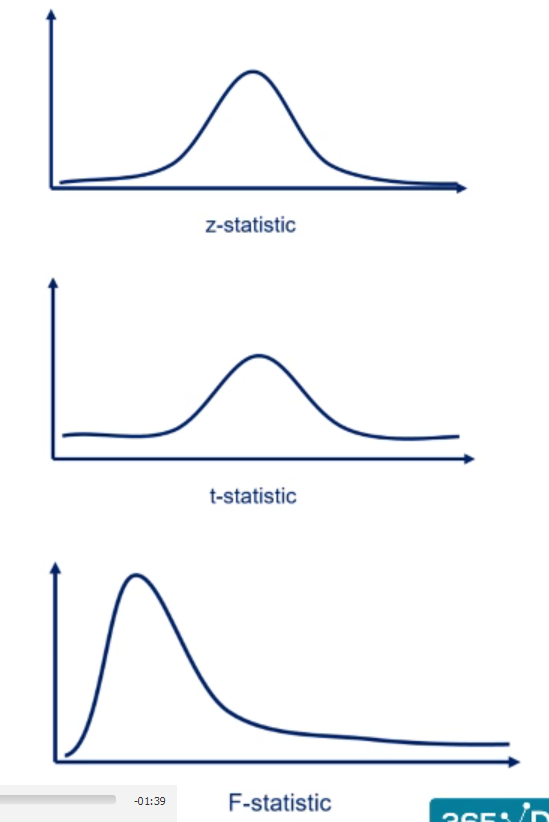

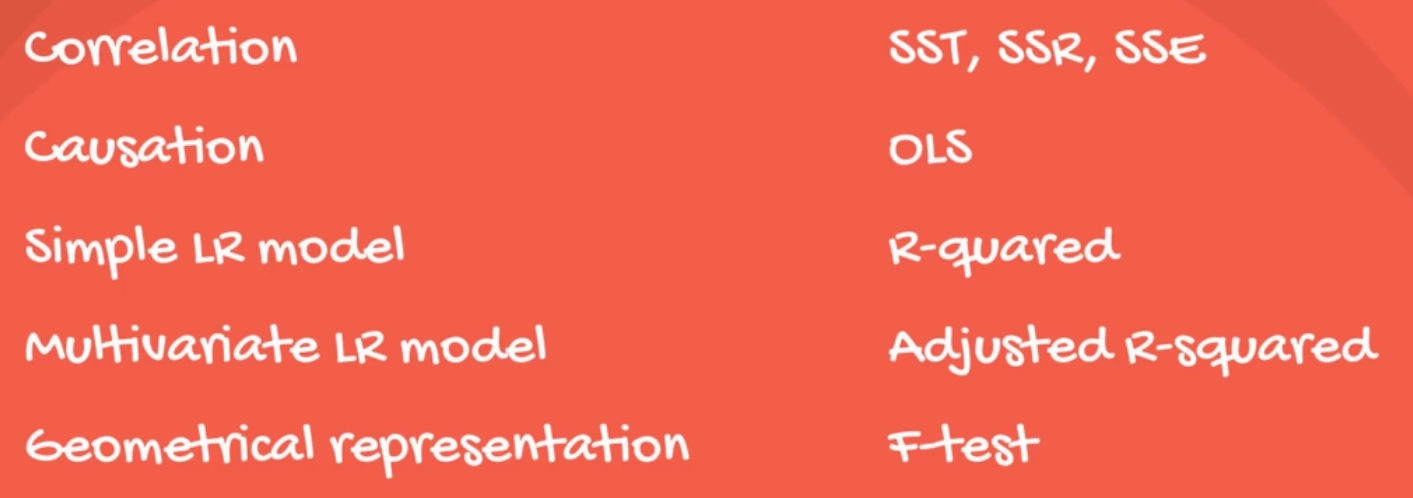

# CONDITION FOR LINEAR REGRESSION (OLS)

Biggest mistake we can ever make is perform a regression which violates one of these assumptions
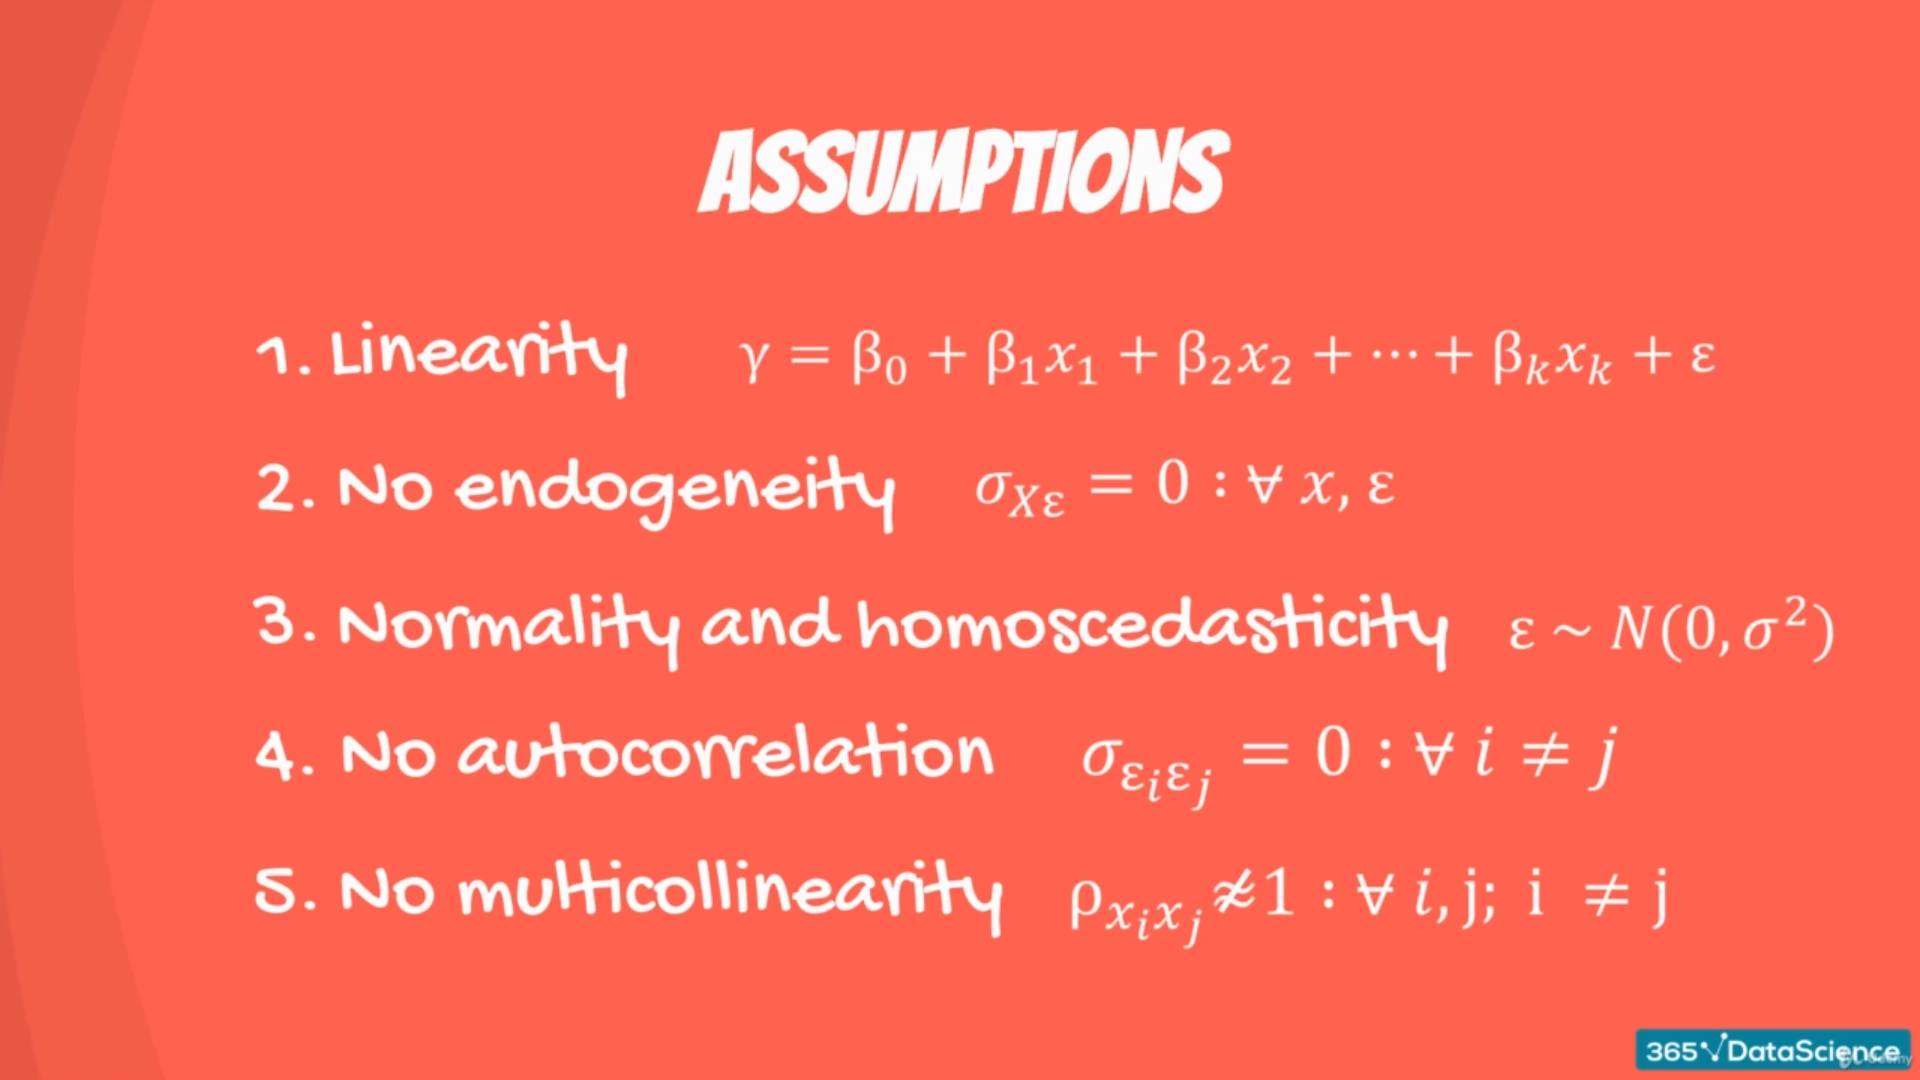

## 1. LINEARITY :

> linear because equation is linear

> How to verify if relationship between two variables is linear?

plot an independan var x1 against dependat var y (on a scatter plot BackGroung)

if straigh lines, good. If cURVES, LINEAR REGRESSION ISNT  APPROPRIATE

#### FIXES: we can transform quadratic, log, exponential eqns to linear eqns 

## 2. NO ENDOGENEITY

> Prohibition of link between independant variables and errors. 

Mathematically : rho(x,E) = 0 (No correlation)
E - error
x - independant variable

##### if rho(x,E) != 0 this is called OMMITED VARIABLE BIAS

#### Omitted variable bias occurs when we forget to include a relevant variable 
and hence degrades the model !!



For example, we forget to include a relevant varianble x* and include some relevant varable x.
Now,

x and y are somewhat CORRELATED

x* and y are somewhat CORRRELATED

this implies,

x and x* are somewhat CORRELATED.

Here as we didnt include x* in the model, everything that cannot be explained goes into x* (i.e model is not able to explain because there is no x* in it )

Hence, x* becomes THE ERROR!!

=> x and E are correlated!!!!!!!

### Omitted Variable bias is 
1. ALWAYS SNEAKY
2. ALWAYS DIFFERENT
3. ONLY EXPEIENCED AND ADVANCE KNOWLEDGE CAN HELP
4. FIELD EXPERTS NEEDED!

# 3. NORMALITY AND HOMOSCEDASTICITY

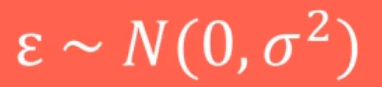



1. NORMALITY OF THE ERROR TERM
2. ZERO MEAN OF THE ERROR TERM
3. HOMOSCEDASTICITY OF THE ERROR TERM


#### i. NORMALITY :
===================

we assume error term is normally distributed (not impt for creating regression.. but for inferences)

eg. T Statistic and F statistic work because we assume error term to be normally dostributed

###### FIXES : Central Limit Theorem!

#### ii. ZERO MEAN OF ERROR TERMS :
========================================
If error mean is not zero, line is not best fitting one
###### Fixes : Having an intercept solves problem, hence unusual to occur

####  iii. HOMOSCEDASTICITY
==================================

Error term must have equal variance one with another

if variances are not equal, and have some payyern for instance, graph looks like this and regression wont work!
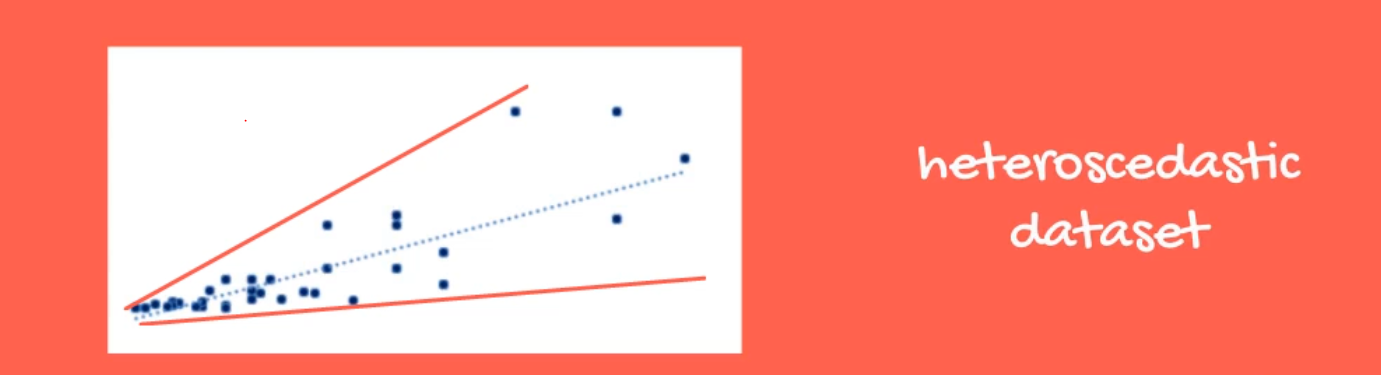

###### FIXES :

1. LOOK FOR OVB (Omitted Variable Bias)
2. OUTLIERS
3. LOG Transformation : regression between natural log(y) and independant vars and vice versa.. or both to log!

example of LOG Transo=formation

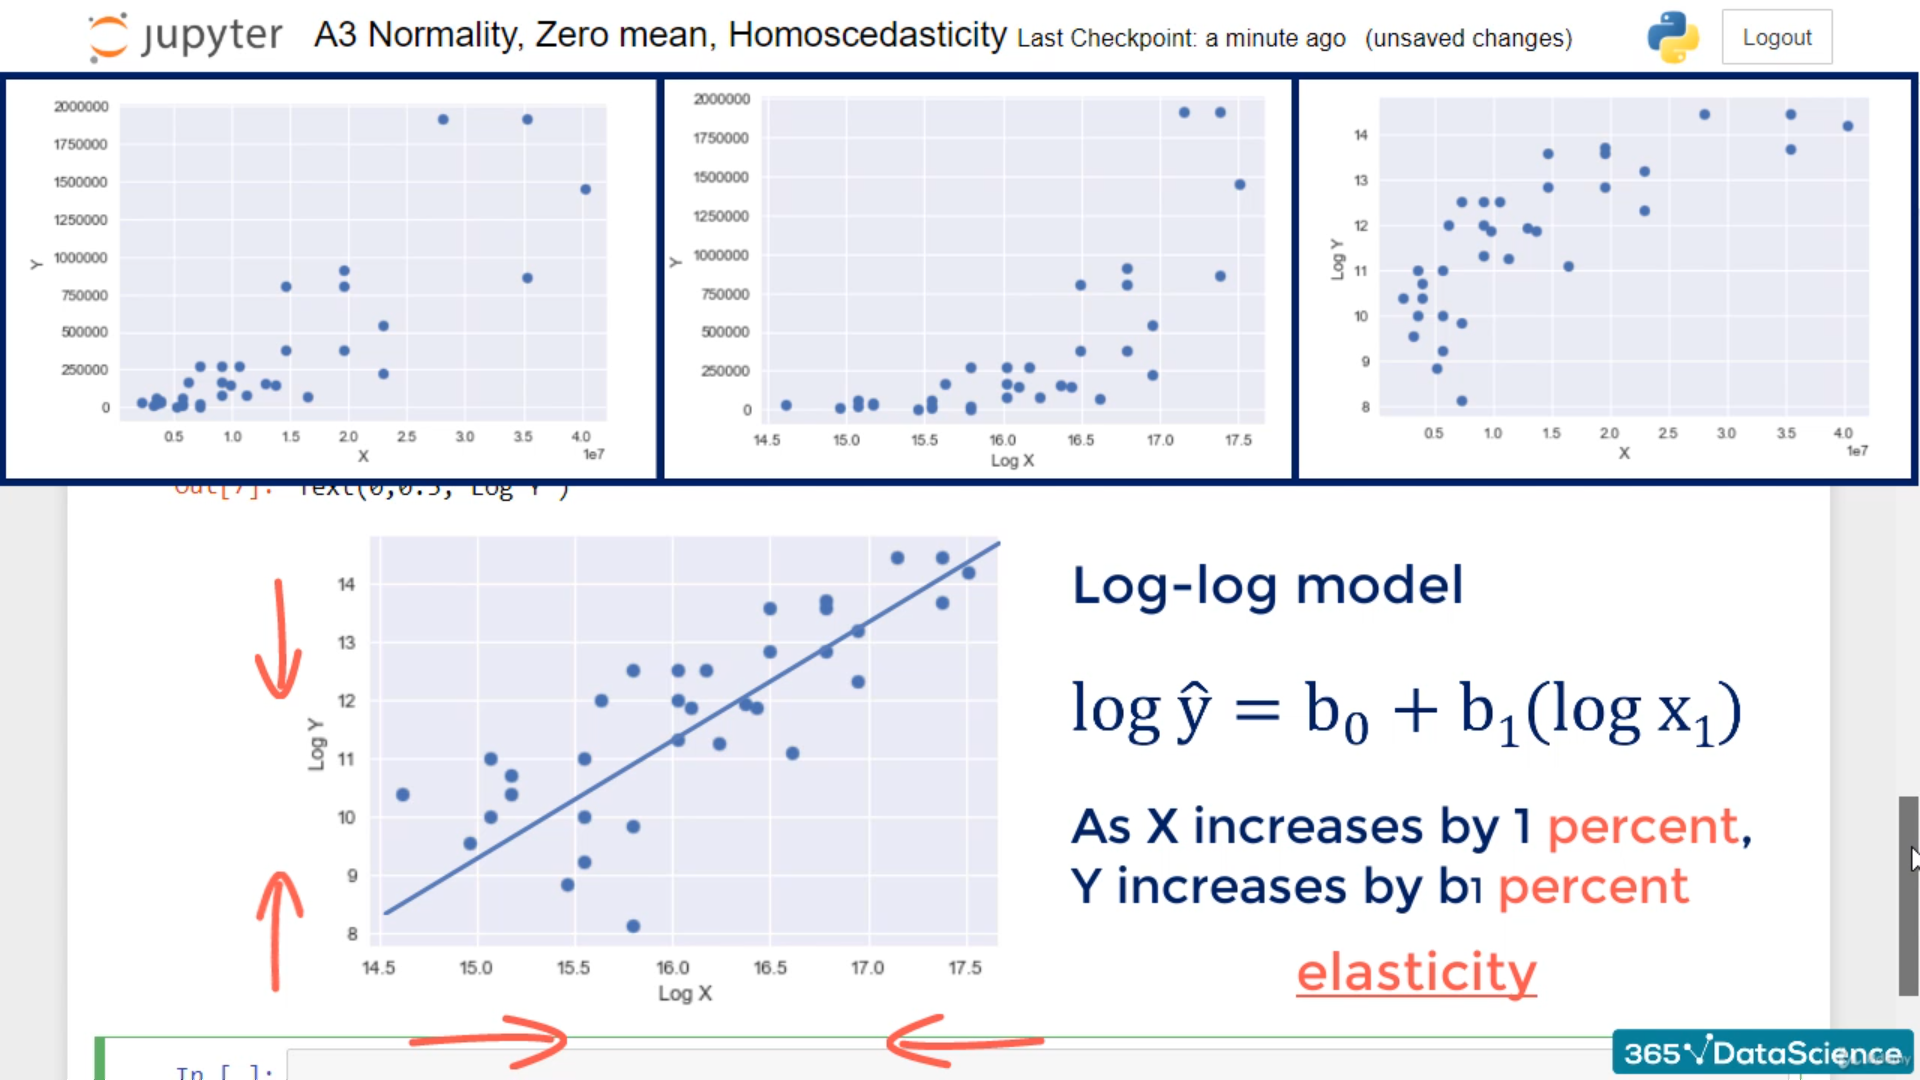

# 4. NO AUTOCORRELATION OF ERRORS

aka NO SERIAL CORELATION

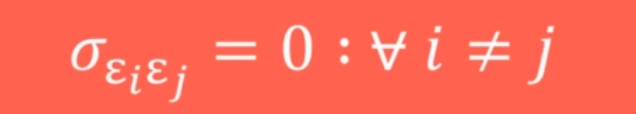

> highy prelevalant in Time series data instead of regualr cross sectional data

DETECTING CORELATION 

> 1. plot scatter plots and try to find patterns.. no patterns => safe

> 2. Durbin-Watson Test (present in summary table)

Values fall between 0 and 4

2 means no autocorelation

<1 and >3 means high autocorelation


#### FIXES : NOOOOOOOO FIXES!!!!!

Simply avaoid applying linear regressions to such models

ALTERNATIVE MODELS

1. Auto Regressive Model
2. Moving Average Model
3. ARMA
4. ARIMA : Auto Regressive Integraed Moving Average Model

# 5. NO MULTICOLLINEARITY

BETWEEN INDEPENDANT VARS
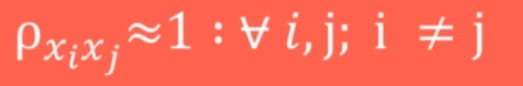

If rho(x1, x2) = 1 or even 0.87... linear regression shouldntt be applied... this is indicated by p-value in summary table with large value

#### FIXES :

1. DROP ONE OF THE TWO VARIABLES
2. TRANSFORM THEM INTO ONE VARIABLE (AVG)
3. KEEP THEM BOTH but proceed with extreme caution!

#### PREVENTION :

Befor starting, try to find correlation between each pair of independant vars

# MULTIVARIATE LINEAR REGRESSION


In [16]:
data.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,random
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,1
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,2
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,3
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,4
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,5


In [17]:
y = data['Price']
x = data[['Avg. Area Income','Avg. Area Income','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]

In [18]:
x = sm.add_constant(x)

E:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [19]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [20]:
x.head()

,const,Avg. Area Income,Avg. Area Income,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,1.0,79545.45857,79545.45857,7.009188,4.09,23086.80050
1,1.0,79248.64245,79248.64245,6.730821,3.09,40173.07217
2,1.0,61287.06718,61287.06718,8.512727,5.13,36882.15940
3,1.0,63345.24005,63345.24005,5.586729,3.26,34310.24283
4,1.0,59982.19723,59982.19723,7.839388,4.23,26354.10947


In [21]:
multimodel = sm.OLS(y, x).fit()

In [23]:
multimodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2940.
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:34:23   Log-Likelihood:                -67941.
No. Observations:                5000   AIC:                         1.359e+05
Df Residuals:                    4995   BIC:                         1.359e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -1.623e+06    2.8e+04    -57.871      0.000   -1.68e+06   -1.57e+06
Avg. Area Income                10.7680      0.128     84.088      0.000      10.517      11.019
Avg. Area Income                10.7680      0.128     84.088      0.000      10.517      11.019
Avg. Area Number of Rooms     1.181e+05   3060.533     38.603      0.000    1.12e+05    1.24e+05
Avg. Area Number of Bedrooms  3370.0992   2495.291      1.351      0.177   -1521.767    8261.965
Area Population                 14.8952      0.275     54.168      0.000      14.356      15.434
==============================================================================
Omnibus:                        3.392   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                3.157
Skew:                          -0.011   Prob(JB):                        0.206
Kurtosis:                       2.879   Cond. No.                     3.92e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.55e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# CHECK THE ABOVE RESULTS FOR THE 5 ASSUMPTIONS OF LINEAR REGRESSSION!!!

In [37]:
#PREDICTIONG OURSELSVES

new_data1 = pd.DataFrame({'const':1.0, 'Avg. Area Income': [0, 10000000000],'Avg. Area Income': [0, 10000000000], 'Avg. Area Number of Rooms':[0, 10000000000], 'Avg. Area Number of Bedrooms':[0, 10000000000], 'Area Population':[0, 10000000000]})

In [36]:
new_data1

,const,Avg. Area Income,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,1.0,0,0,0,0
1,1.0,10000000000,10000000000,10000000000,10000000000


In [28]:
x.head()

,const,Avg. Area Income,Avg. Area Income,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,1.0,79545.45857,79545.45857,7.009188,4.09,23086.80050
1,1.0,79248.64245,79248.64245,6.730821,3.09,40173.07217
2,1.0,61287.06718,61287.06718,8.512727,5.13,36882.15940
3,1.0,63345.24005,63345.24005,5.586729,3.26,34310.24283
4,1.0,59982.19723,59982.19723,7.839388,4.23,26354.10947


In [39]:
model.predict(newdta)

NameError: name 'model' is not defined